# Electricity Demand & Price Forecasting

Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Datasets

In [2]:
df_energy=pd.read_excel("energy_dataset.xlsx")
df_weather=pd.read_excel("weather_features.xlsx")

In [3]:
df_energy.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17,NaN,6436,26118,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16,NaN,5856,24934,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8,NaN,5454,23515,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2,NaN,5151,22642,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9,NaN,4861,21785,20264.0,38.41,56.04


In [4]:
df_energy.shape

(35064, 29)

In [5]:
df_weather.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [6]:
df_weather.shape

(178396, 17)

Merging the dataset

In [7]:
df_weather=df_weather.drop(columns=['city_name'])

In [8]:
df_energy['time'] = pd.to_datetime(df_energy['time'],utc=True)
df_weather['dt_iso'] = pd.to_datetime(df_weather['dt_iso'],utc=True)

In [9]:
df_weather_agg  = df_weather.groupby('dt_iso').agg({
    'temp' : 'mean',
    'temp_min' 	: 'mean',
    'temp_max'	: 'mean',
    'pressure'	: 'mean',
    'humidity'	: 'mean',
    'wind_speed' :	'mean',
    'wind_deg'	: 'mean',
    'rain_1h'	: 'mean',
    'rain_3h'	: 'mean',
    'snow_3h'	: 'mean',
    'clouds_all' :	'mean',
    'weather_id'	: lambda x: x.mode()[0],
    'weather_main' :	lambda x: x.mode()[0],
    'weather_description' : lambda x: x.mode()[0],
    'weather_icon' : lambda x: x.mode()[0],
    }
).reset_index()

C:\Users\KUMAR PUSHPAM\AppData\Local\Temp\ipykernel_13820\1603468826.py:16: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'int'
  'weather_icon' : lambda x: x.mode()[0],
C:\Users\KUMAR PUSHPAM\AppData\Local\Temp\ipykernel_13820\1603468826.py:16: UserWarning: Unable to sort modes: '<' not supported between instances of 'int' and 'str'
  'weather_icon' : lambda x: x.mode()[0],


In [10]:
merged_df = pd.merge(df_energy, df_weather_agg, left_on='time', right_on='dt_iso')

In [11]:
merged_df =  merged_df.drop(columns=['dt_iso'])

In [12]:
merged_df.shape

(35064, 44)

In [13]:
merged_df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,2.0,135.2,0.0,0.0,0.0,0.0,800,clear,sky is clear,01n
1,2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,2.0,135.8,0.0,0.0,0.0,0.0,800,clear,sky is clear,01n
2,2015-01-01 01:00:00+00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,2.4,119.0,0.0,0.0,0.0,0.0,800,clear,sky is clear,01n
3,2015-01-01 02:00:00+00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,2.4,119.2,0.0,0.0,0.0,0.0,800,clear,sky is clear,01n
4,2015-01-01 03:00:00+00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,2.4,118.4,0.0,0.0,0.0,0.0,800,clear,sky is clear,01n


In [14]:
merged_df.to_csv('Merged_data.csv')

# EDA:Exploratary Data Analysis

In [15]:
merged_df.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'temp', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'wind_speed', 'wind_deg', 

In [16]:
# Display information about the dataframe
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 44 columns):
 #   Column                                       Non-Null Count  Dtype              
---  ------                                       --------------  -----              
 0   time                                         35064 non-null  datetime64[ns, UTC]
 1   generation biomass                           35045 non-null  float64            
 2   generation fossil brown coal/lignite         35046 non-null  float64            
 3   generation fossil coal-derived gas           35046 non-null  float64            
 4   generation fossil gas                        35046 non-null  float64            
 5   generation fossil hard coal                  35046 non-null  float64            
 6   generation fossil oil                        35045 non-null  float64            
 7   generation fossil oil shale                  35046 non-null  float64            
 8   generation fossil peat    

In [17]:
# Summary statistics
merged_df.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,...,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,...,291.147454,1070.205996,68.217013,2.467529,166.614552,0.073212,0.000386,0.004846,24.737415,766.310375
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,...,7.507959,2692.266470,14.890167,1.357751,57.493555,0.202562,0.003360,0.101103,17.306731,102.859365
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,271.941863,812.400000,22.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,285.350000,1012.800000,56.800000,1.400000,126.400000,0.000000,0.000000,0.000000,12.000000,800.000000
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,290.550000,1017.000000,69.800000,2.200000,166.000000,0.000000,0.000000,0.000000,22.400000,800.000000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,296.750000,1021.000000,80.200000,3.200000,207.800000,0.060000,0.000000,0.000000,35.000000,800.000000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,313.548000,202469.000000,100.000000,29.800000,338.000000,4.150000,0.463000,4.300000,93.600000,804.000000


In [18]:
# Check for missing values
print(merged_df.isnull().sum())

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

In [19]:
# Handle missing values
threshold = 0.5  # If more than 50% of the values are missing, drop the column
merged_df = merged_df.loc[:, merged_df.isnull().mean() < threshold]

In [20]:
# Fill missing numeric values with the mean
numeric_cols = merged_df.select_dtypes(include=np.number).columns
merged_df.loc[:, numeric_cols] = merged_df.loc[:, numeric_cols].fillna(merged_df[numeric_cols].mean())

# Fill missing categorical values with the mode
categorical_cols = merged_df.select_dtypes(include='object').columns
for col in categorical_cols:
    merged_df.loc[:, col] = merged_df[col].fillna(merged_df[col].mode()[0])

In [21]:
print(merged_df.isnull().sum())

time                                           0
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil coal-derived gas             0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation fossil oil shale                    0
generation fossil peat                         0
generation geothermal                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation marine                              0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind offshore                       0
generation wind onsh

outliers detection

In [22]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

# Detect outliers in numeric columns
outliers_dict = {col: detect_outliers_iqr(merged_df, col) for col in numeric_cols}

# Print the number of outliers detected for each numeric feature
for col, outliers in outliers_dict.items():
    print(f'{col}: {len(outliers)} outliers detected')

# Function to cap outliers
def cap_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Explicitly cast bounds to match the data type of the feature
    if np.issubdtype(df[feature].dtype, np.integer):
        lower_bound = int(lower_bound)
        upper_bound = int(upper_bound)
    elif np.issubdtype(df[feature].dtype, np.floating):
        lower_bound = float(lower_bound)
        upper_bound = float(upper_bound)
    
    df.loc[df[feature] < lower_bound, feature] = lower_bound
    df.loc[df[feature] > upper_bound, feature] = upper_bound
    return df

# Cap outliers in numeric columns
for col in numeric_cols:
    merged_df = cap_outliers(merged_df, col)

generation biomass: 87 outliers detected
generation fossil brown coal/lignite: 0 outliers detected
generation fossil coal-derived gas: 0 outliers detected
generation fossil gas: 2187 outliers detected
generation fossil hard coal: 0 outliers detected
generation fossil oil: 246 outliers detected
generation fossil oil shale: 0 outliers detected
generation fossil peat: 0 outliers detected
generation geothermal: 0 outliers detected
generation hydro pumped storage consumption: 3772 outliers detected
generation hydro run-of-river and poundage: 0 outliers detected
generation hydro water reservoir: 344 outliers detected
generation marine: 0 outliers detected
generation nuclear: 76 outliers detected
generation other: 1267 outliers detected
generation other renewable: 5 outliers detected
generation solar: 0 outliers detected
generation waste: 328 outliers detected
generation wind offshore: 0 outliers detected
generation wind onshore: 380 outliers detected
forecast solar day ahead: 0 outliers dete

In [23]:
# Print the dataframe after outlier handling
merged_df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.5,0.0,0.0,0.0,...,2.0,135.2,0.0,0.0,0.0,0.0,800,clear,sky is clear,01n
1,2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,162.5,0.0,0.0,0.0,...,2.0,135.8,0.0,0.0,0.0,0.0,800,clear,sky is clear,01n
2,2015-01-01 01:00:00+00:00,448.0,323.0,0.0,4857.0,4581.0,162.5,0.0,0.0,0.0,...,2.4,119.0,0.0,0.0,0.0,0.0,800,clear,sky is clear,01n
3,2015-01-01 02:00:00+00:00,438.0,254.0,0.0,4314.0,4131.0,162.5,0.0,0.0,0.0,...,2.4,119.2,0.0,0.0,0.0,0.0,800,clear,sky is clear,01n
4,2015-01-01 03:00:00+00:00,428.0,187.0,0.0,4130.0,3840.0,162.5,0.0,0.0,0.0,...,2.4,118.4,0.0,0.0,0.0,0.0,800,clear,sky is clear,01n


# Visualizations

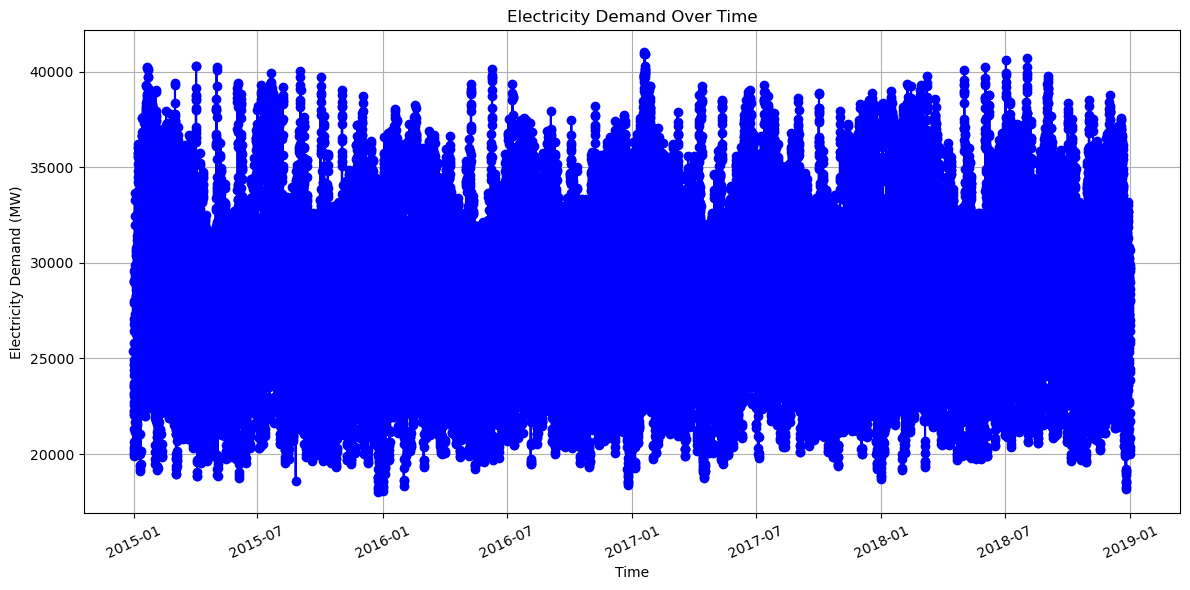

In [24]:
# Line Plot of Electricity Demand Over Time
plt.figure(figsize=(12, 6))
plt.plot(merged_df['time'], merged_df['total load actual'], marker='o', linestyle='-', color='b')
plt.title('Electricity Demand Over Time')
plt.xlabel('Time')
plt.ylabel('Electricity Demand (MW)')
plt.xticks(rotation=25)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\KUMAR PUSHPAM\anaconda3\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


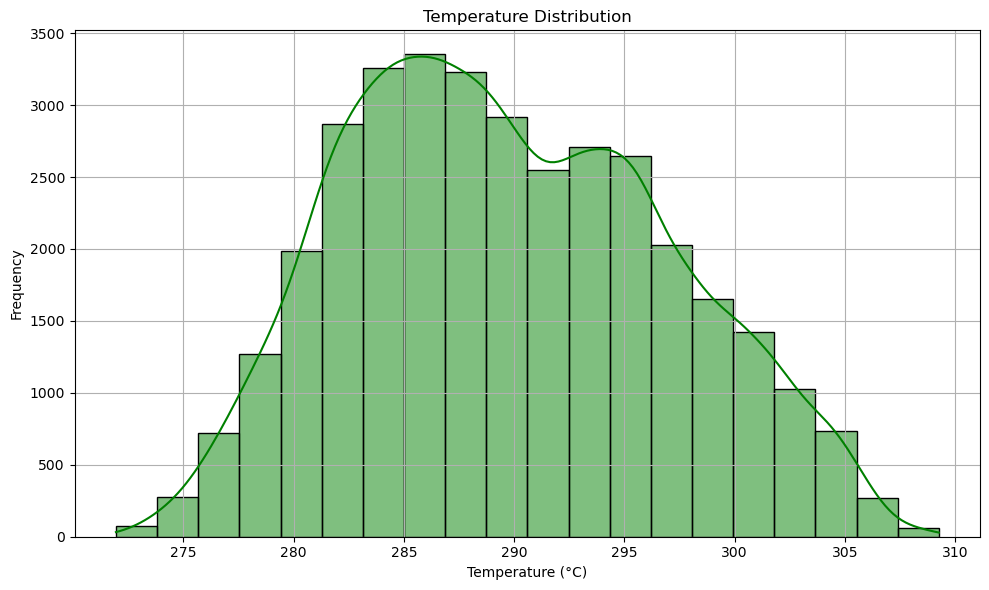

In [25]:
# Histogram of Temperature Distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['temp'], bins=20, kde=True, color='g')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

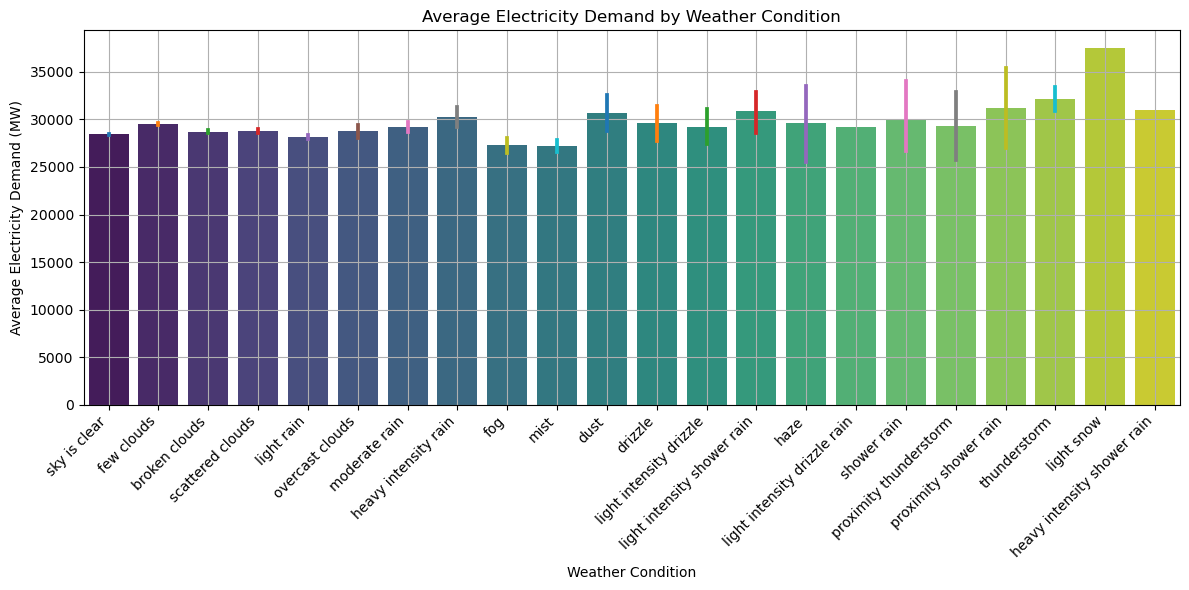

In [26]:
plt.figure(figsize=(12, 6))  # Increase figure width for better spacing
sns.barplot(x='weather_description', y='total load actual', data=merged_df, estimator=np.mean, errcolor=None, palette='viridis')
plt.title('Average Electricity Demand by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Electricity Demand (MW)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels and adjust alignment
plt.grid(True)
plt.tight_layout()
plt.show()

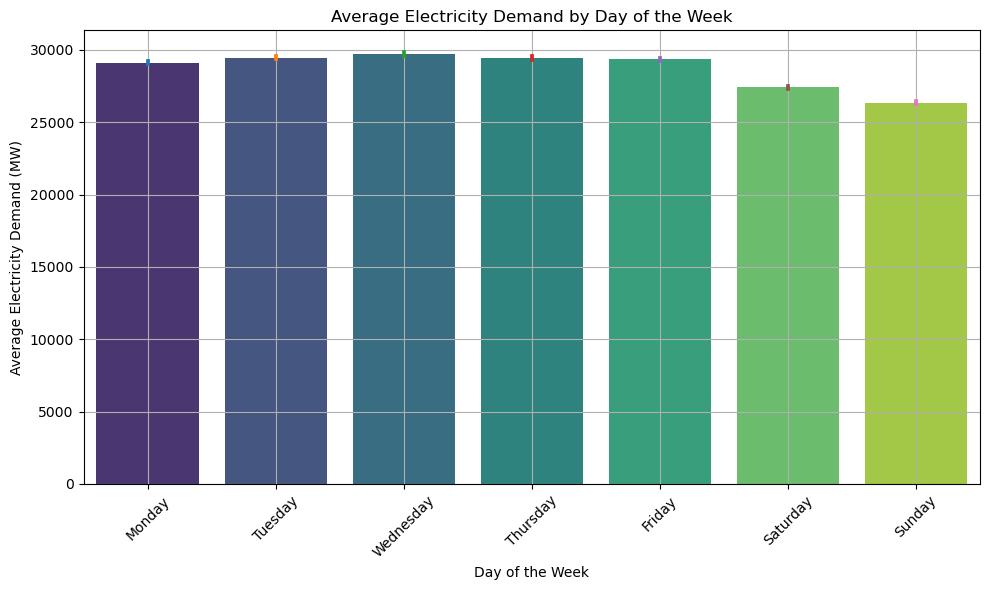

In [27]:
# Calculate day of the week
merged_df['day_of_week'] = merged_df['time'].dt.day_name()

# Define the order of days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot Average Electricity Demand by Day of the Week
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='total load actual', data=merged_df, order=day_order, errcolor=None, palette='viridis')
plt.title('Average Electricity Demand by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Electricity Demand (MW)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

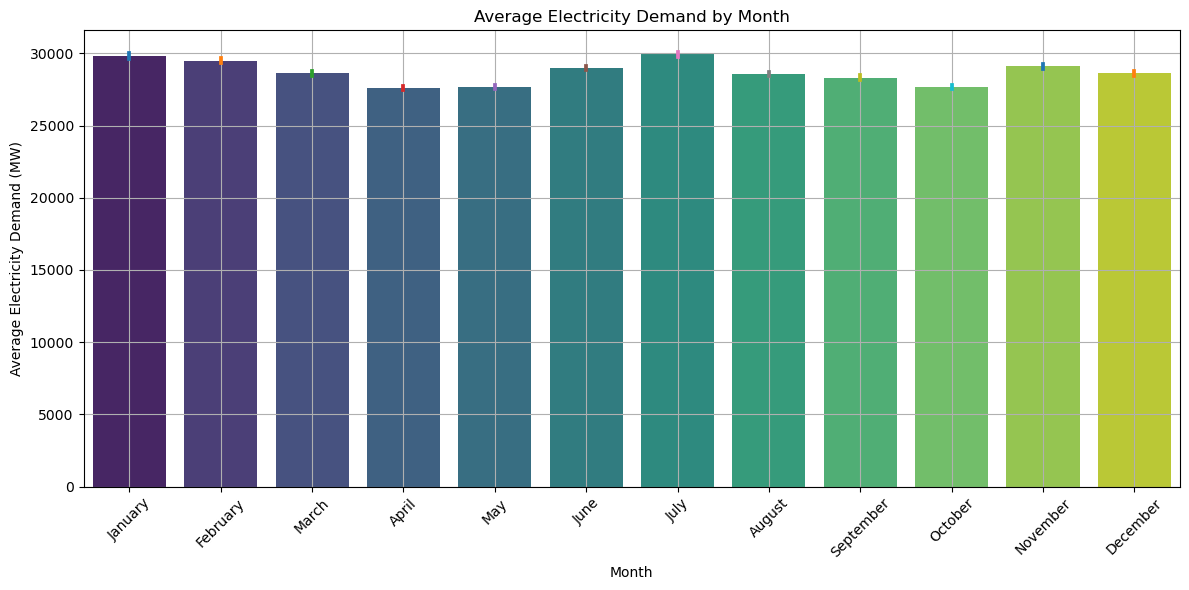

In [28]:
# Extract month from time column
merged_df['month'] = merged_df['time'].dt.month_name()

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Plot Bar Chart Comparing Electricity Demand by Month
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='total load actual', data=merged_df, estimator=np.mean, 
            order=month_order, errcolor=None, palette='viridis')
plt.title('Average Electricity Demand by Month')
plt.xlabel('Month')
plt.ylabel('Average Electricity Demand (MW)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Feature Engineering

In [29]:
# Hour of the Day
merged_df['hour'] = merged_df['time'].dt.hour

# Season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

merged_df['season'] = merged_df['time'].dt.month.apply(get_season)

# Weather Type Simplification
merged_df['weather_type'] = merged_df['weather_main'].str.lower()

# Weekend Indicator
merged_df['is_weekend'] = merged_df['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)

# Temperature Range
merged_df['temp_range'] = merged_df['temp_max'] - merged_df['temp_min']

# Rain and Snow Indicators
merged_df['is_raining'] = (merged_df['rain_1h'] > 0).astype(int)
merged_df['is_snowing'] = (merged_df['snow_3h'] > 0).astype(int)

In [30]:
merged_df

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,weather_icon,day_of_week,month,hour,season,weather_type,is_weekend,temp_range,is_raining,is_snowing
0,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.5,0.0,0.0,0.0,...,01n,Wednesday,December,23,Winter,clear,0,0.0,0,0
1,2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,162.5,0.0,0.0,0.0,...,01n,Thursday,January,0,Winter,clear,0,0.0,0,0
2,2015-01-01 01:00:00+00:00,448.0,323.0,0.0,4857.0,4581.0,162.5,0.0,0.0,0.0,...,01n,Thursday,January,1,Winter,clear,0,0.0,0,0
3,2015-01-01 02:00:00+00:00,438.0,254.0,0.0,4314.0,4131.0,162.5,0.0,0.0,0.0,...,01n,Thursday,January,2,Winter,clear,0,0.0,0,0
4,2015-01-01 03:00:00+00:00,428.0,187.0,0.0,4130.0,3840.0,162.5,0.0,0.0,0.0,...,01n,Thursday,January,3,Winter,clear,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 18:00:00+00:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,01n,Monday,December,18,Winter,clear,0,2.2,0,0
35060,2018-12-31 19:00:00+00:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,01n,Monday,December,19,Winter,clear,0,2.4,0,0
35061,2018-12-31 20:00:00+00:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,01n,Monday,December,20,Winter,clear,0,1.0,0,0
35062,2018-12-31 21:00:00+00:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,01n,Monday,December,21,Winter,clear,0,2.0,0,0


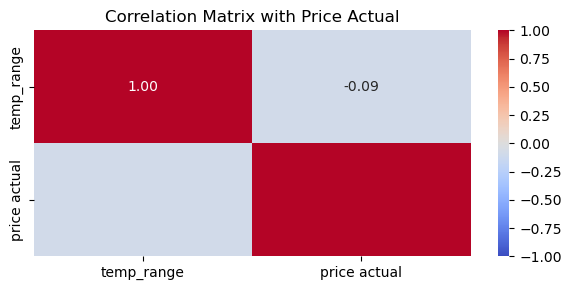

In [31]:
# Define the dependent variable (target)
dependent_variable = 'price actual'

# Define the independent variables (features)
independent_variables = ['temp_range']

# Selecting the relevant columns
data_for_analysis = merged_df[independent_variables + [dependent_variable]]

# Calculate the correlation matrix
correlation_matrix = data_for_analysis.corr(numeric_only=True)

# Plotting the correlation matrix
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix with Price Actual')
plt.tight_layout()

# Show plot
plt.show()

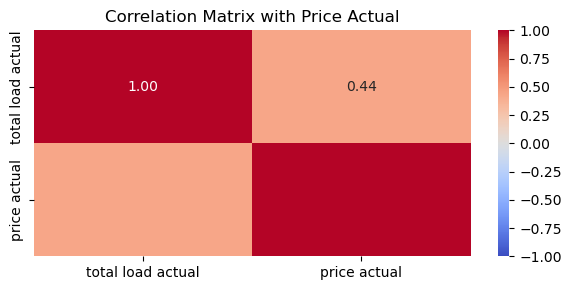

In [32]:
# Define the dependent variable (target)
dependent_variable = 'price actual'

# Define the independent variables (features)
independent_variables = ['total load actual']

# Selecting the relevant columns
data_for_analysis = merged_df[independent_variables + [dependent_variable]]

# Calculate the correlation matrix
correlation_matrix = data_for_analysis.corr(numeric_only=True)

# Plotting the correlation matrix
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix with Price Actual')
plt.tight_layout()

# Show plot
plt.show()

# Linear Regression Model

In [33]:
merged_df

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,weather_icon,day_of_week,month,hour,season,weather_type,is_weekend,temp_range,is_raining,is_snowing
0,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.5,0.0,0.0,0.0,...,01n,Wednesday,December,23,Winter,clear,0,0.0,0,0
1,2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,162.5,0.0,0.0,0.0,...,01n,Thursday,January,0,Winter,clear,0,0.0,0,0
2,2015-01-01 01:00:00+00:00,448.0,323.0,0.0,4857.0,4581.0,162.5,0.0,0.0,0.0,...,01n,Thursday,January,1,Winter,clear,0,0.0,0,0
3,2015-01-01 02:00:00+00:00,438.0,254.0,0.0,4314.0,4131.0,162.5,0.0,0.0,0.0,...,01n,Thursday,January,2,Winter,clear,0,0.0,0,0
4,2015-01-01 03:00:00+00:00,428.0,187.0,0.0,4130.0,3840.0,162.5,0.0,0.0,0.0,...,01n,Thursday,January,3,Winter,clear,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 18:00:00+00:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,01n,Monday,December,18,Winter,clear,0,2.2,0,0
35060,2018-12-31 19:00:00+00:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,01n,Monday,December,19,Winter,clear,0,2.4,0,0
35061,2018-12-31 20:00:00+00:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,01n,Monday,December,20,Winter,clear,0,1.0,0,0
35062,2018-12-31 21:00:00+00:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,01n,Monday,December,21,Winter,clear,0,2.0,0,0


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the dependent variable (target)
dependent_variable = 'price actual'

# Define the independent variables (features)
independent_variables = [
    'total load actual', 'temp', 'temp_min', 'temp_max', 'humidity', 
    'wind_speed', 'rain_1h', 'clouds_all', 'hour', 'is_weekend', 
    'temp_range', 'is_raining', 'is_snowing'
]

In [35]:
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [46]:
# Split the data into training and testing sets
X = data_for_analysis[independent_variables]
y = data_for_analysis[dependent_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2 = adjusted_r2(r2, X_test.shape[0], X_test.shape[1])
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print metrics
print('price actual')
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Adjusted R-squared:", adj_r2)
print("Mean Absolute Percentage Error (MAPE):", mape)

price actual
Mean Absolute Error (MAE): 2807.1332630292063
Mean Squared Error (MSE): 12194152.078091048
Root Mean Squared Error (RMSE): 3492.0126113877436
R-squared (R2): 0.4149327179567541
Adjusted R-squared: 0.41384600918884984
Mean Absolute Percentage Error (MAPE): 10.020559238602381


In [43]:
# Define the dependent variable (target)
dependent_variable = 'total load actual'

# Define the independent variables (features)
independent_variables = [
    'price actual', 'temp', 'temp_min', 'temp_max', 'humidity', 
    'wind_speed', 'rain_1h', 'clouds_all', 'hour', 'is_weekend', 
    'temp_range', 'is_raining', 'is_snowing'
]

In [44]:
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [45]:
# Split the data into training and testing sets
X = data_for_analysis[independent_variables]
y = data_for_analysis[dependent_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2 = adjusted_r2(r2, X_test.shape[0], X_test.shape[1])
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print metrics
print('total load actual')
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Adjusted R-squared:", adj_r2)
print("Mean Absolute Percentage Error (MAPE):", mape)

total load actual
Mean Absolute Error (MAE): 2807.1332630292063
Mean Squared Error (MSE): 12194152.078091048
Root Mean Squared Error (RMSE): 3492.0126113877436
R-squared (R2): 0.4149327179567541
Adjusted R-squared: 0.41384600918884984
Mean Absolute Percentage Error (MAPE): 10.020559238602381


# RandomForest Model

In [39]:
from sklearn.ensemble import RandomForestRegressor

# Define adjusted R2
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Define MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [40]:
# Define the dependent variable (target)
dependent_variable = 'price actual'

# Define the independent variables (features)
independent_variables = [
    'total load actual', 'temp', 'temp_min', 'temp_max', 'humidity', 
    'wind_speed', 'rain_1h', 'clouds_all', 'hour', 'is_weekend', 
    'temp_range', 'is_raining', 'is_snowing'
]

# Selecting the relevant columns
data_for_analysis = merged_df[independent_variables + [dependent_variable]]

# Drop any rows with missing values
data_for_analysis.dropna(inplace=True)

# Ensure all variables are numeric
data_for_analysis = data_for_analysis.apply(pd.to_numeric, errors='coerce')
data_for_analysis = data_for_analysis.fillna(0)

# Split the data into training and testing sets
X = data_for_analysis[independent_variables]
y = data_for_analysis[dependent_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


C:\Users\KUMAR PUSHPAM\AppData\Local\Temp\ipykernel_13820\2625646640.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_analysis.dropna(inplace=True)


In [41]:
# Fit the random forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


In [42]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2 = adjusted_r2(r2, X_test.shape[0], X_test.shape[1])
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print metrics
print('Price Actual')
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Adjusted R-squared:", adj_r2)
print("Mean Absolute Percentage Error (MAPE):", mape)


Price Actual
Mean Absolute Error (MAE): 6.947934671324683
Mean Squared Error (MSE): 79.79027306735175
Root Mean Squared Error (RMSE): 8.93254012402697
R-squared (R2): 0.5916466189062363
Adjusted R-squared: 0.5908881399872166
Mean Absolute Percentage Error (MAPE): 13.728993151965781


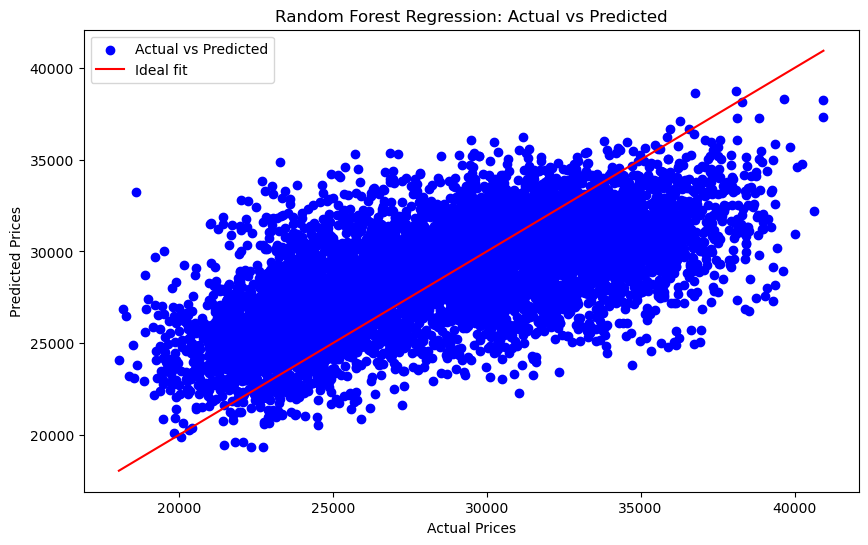

In [47]:
#Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest Regression: Actual vs Predicted')
plt.legend()
plt.show()

In [48]:
# Define the dependent variable (target)
dependent_variable = 'total load actual'

# Define the independent variables (features)
independent_variables = [
    'price actual', 'temp', 'temp_min', 'temp_max', 'humidity', 
    'wind_speed', 'rain_1h', 'clouds_all', 'hour', 'is_weekend', 
    'temp_range', 'is_raining', 'is_snowing'
]

# Selecting the relevant columns
data_for_analysis = merged_df[independent_variables + [dependent_variable]]

# Drop any rows with missing values
data_for_analysis.dropna(inplace=True)

# Ensure all variables are numeric
data_for_analysis = data_for_analysis.apply(pd.to_numeric, errors='coerce')
data_for_analysis = data_for_analysis.fillna(0)

# Split the data into training and testing sets
X = data_for_analysis[independent_variables]
y = data_for_analysis[dependent_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\KUMAR PUSHPAM\AppData\Local\Temp\ipykernel_13820\3789183250.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_analysis.dropna(inplace=True)


In [49]:
# Fit the random forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

In [50]:
#Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2 = adjusted_r2(r2, X_test.shape[0], X_test.shape[1])
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print metrics
print('Total Load Actual')
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Adjusted R-squared:", adj_r2)
print("Mean Absolute Percentage Error (MAPE):", mape)

Total Load Actual
Mean Absolute Error (MAE): 1802.5113839543753
Mean Squared Error (MSE): 6180013.805070648
Root Mean Squared Error (RMSE): 2485.9633555365713
R-squared (R2): 0.7034870602918992
Adjusted R-squared: 0.7029363147259319
Mean Absolute Percentage Error (MAPE): 6.437864167031869


# Gradient Boosting Model

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

# Define adjusted R2
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Define MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [52]:
# Define the dependent variable (target)
dependent_variable = 'price actual'

# Define the independent variables (features)
independent_variables = [
    'total load actual', 'temp', 'temp_min', 'temp_max', 'humidity', 
    'wind_speed', 'rain_1h', 'clouds_all', 'hour', 'is_weekend', 
    'temp_range', 'is_raining', 'is_snowing'
]

# Selecting the relevant columns
data_for_analysis = merged_df[independent_variables + [dependent_variable]]

# Drop any rows with missing values
data_for_analysis.dropna(inplace=True)

# Ensure all variables are numeric
data_for_analysis = data_for_analysis.apply(pd.to_numeric, errors='coerce')
data_for_analysis = data_for_analysis.fillna(0)

# Split the data into training and testing sets
X = data_for_analysis[independent_variables]
y = data_for_analysis[dependent_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


C:\Users\KUMAR PUSHPAM\AppData\Local\Temp\ipykernel_13820\2625646640.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_analysis.dropna(inplace=True)


In [53]:
# Fit the gradient boosting model
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


In [54]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2 = adjusted_r2(r2, X_test.shape[0], X_test.shape[1])
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print metrics
print('Price Actual')
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Adjusted R-squared:", adj_r2)
print("Mean Absolute Percentage Error (MAPE):", mape)

Price Actual
Mean Absolute Error (MAE): 8.161350521485906
Mean Squared Error (MSE): 103.13273941464767
Root Mean Squared Error (RMSE): 10.155429061080959
R-squared (R2): 0.47218374843905975
Adjusted R-squared: 0.4712033782046988
Mean Absolute Percentage Error (MAPE): 16.276357654634683


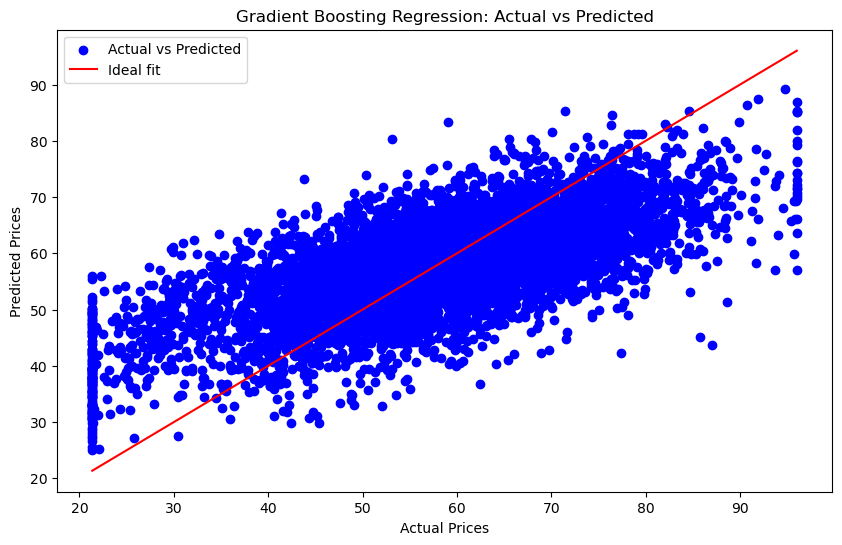

In [55]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Gradient Boosting Regression: Actual vs Predicted')
plt.legend()
plt.show()

In [56]:
# Define the dependent variable (target)
dependent_variable = 'total load actual'

# Define the independent variables (features)
independent_variables = [
    'price actual', 'temp', 'temp_min', 'temp_max', 'humidity', 
    'wind_speed', 'rain_1h', 'clouds_all', 'hour', 'is_weekend', 
    'temp_range', 'is_raining', 'is_snowing'
]

# Selecting the relevant columns
data_for_analysis = merged_df[independent_variables + [dependent_variable]]

# Drop any rows with missing values
data_for_analysis.dropna(inplace=True)

# Ensure all variables are numeric
data_for_analysis = data_for_analysis.apply(pd.to_numeric, errors='coerce')
data_for_analysis = data_for_analysis.fillna(0)

# Split the data into training and testing sets
X = data_for_analysis[independent_variables]
y = data_for_analysis[dependent_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


C:\Users\KUMAR PUSHPAM\AppData\Local\Temp\ipykernel_13820\1000152824.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_analysis.dropna(inplace=True)


In [57]:
# Fit the gradient boosting model
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

In [58]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2 = adjusted_r2(r2, X_test.shape[0], X_test.shape[1])
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print metrics
print('Price Actual')
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Adjusted R-squared:", adj_r2)
print("Mean Absolute Percentage Error (MAPE):", mape)

Price Actual
Mean Absolute Error (MAE): 1992.8404660346582
Mean Squared Error (MSE): 7193277.407561551
Root Mean Squared Error (RMSE): 2682.02859931835
R-squared (R2): 0.6548713485879407
Adjusted R-squared: 0.6542303038003486
Mean Absolute Percentage Error (MAPE): 7.112252636207889


# Hyperparameter Tuning

In [69]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Define adjusted R2
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Define MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# Define the dependent variable (target)
dependent_variable = 'price actual'

# Define the independent variables (features)
independent_variables = [
    'total load actual', 'temp', 'temp_min', 'temp_max', 'humidity', 
    'wind_speed', 'rain_1h', 'clouds_all', 'hour', 'is_weekend', 
    'temp_range', 'is_raining', 'is_snowing'
]

# Selecting the relevant columns into a new DataFrame
data_for_analysis = merged_df[independent_variables + [dependent_variable]].copy()

# Drop any rows with missing values in the original DataFrame
data_for_analysis.dropna(inplace=True)

# Split the data into training and testing sets
X = data_for_analysis[independent_variables]
y = data_for_analysis[dependent_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the model
model = LinearRegression()

# Define parameters for Grid Search (no 'normalize' parameter for LinearRegression)
parameters = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

# Define Grid Search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=5, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Negative MAE):", grid_search.best_score_)

# Predict using the best model from Grid Search
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2 = adjusted_r2(r2, X_test.shape[0], X_test.shape[1])
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print metrics
print("Metrics for", dependent_variable)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Adjusted R-squared:", adj_r2)
print("Mean Absolute Percentage Error (MAPE):", mape)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'copy_X': True, 'fit_intercept': False}
Best Score (Negative MAE): -9.011944498342817
Metrics for price actual
Mean Absolute Error (MAE): 9.13826659353548
Mean Squared Error (MSE): 131.84355957796734
Root Mean Squared Error (RMSE): 11.482315079197546
R-squared (R2): 0.3252465337014925
Adjusted R-squared: 0.3239932410794206
Mean Absolute Percentage Error (MAPE): 18.37510466778641
